<a href="https://colab.research.google.com/github/sid1336/Computational-Physics-Projects/blob/main/Photonic_Crystals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstact: This Research Project Mainly focuses on How dark matter partcles would potentially interact with a photonic crystal. The main objective of this Project is to verify this https://arxiv.org/abs/2401.17260v1 paper - Dark Matter Searches on a Photonic Chip.

In [1]:
!pip install legume-gme

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for legume-gme: filename=legume_gme-1.0.0-py3-none-any.whl size=81293 sha256=d9fbe04ff45119dacc5ffc95bebf8a3c7f147110d41b890a09b39d6bb7c99acc
  Stored in directory: /root/.cache/pip/wheels/0c/49/5e/3ff56b37c3e4828194eb67e18e163537418b0b11a6d62af6c5
Successfully built legume-gme


In [102]:
import legume
from legume import GuidedModeExp, PhotCryst, Lattice, gme
from legume.minimize import Minimize
import matplotlib.pyplot as plt
import time
import autograd.numpy as np
from autograd import grad, value_and_grad

Creating a photonic crystal

```
# This is formatted as code
```



Initializations

In [151]:
D = 1
eps_b = 11.3
eps_lower, eps_upper = 1.0, 1.0
gmax = 10
c = 1
numeig = 10

Photonic Structure

In [152]:
lattice = legume.Lattice([1/10.,0],[0,1/10.])
phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
phc.add_layer(d=D, eps_b=eps_b)

Define the path in the Brillouin zone

In [153]:
path = lattice.bz_path([[0, 0], [4 * 2 * np.pi, 0]], [10])

Printing Kpoints

In [154]:
print("K-points path:", path['kpoints'])

K-points path: [[ 0.          2.51327412  5.02654825  7.53982237 10.05309649 12.56637061
  15.07964474 17.59291886 20.10619298 22.61946711 25.13274123]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]


Simulation options

In [155]:
options = {'gmode_inds': [1, 3, 5, 7, 9],  # Take only the modes with H in the xy-plane
           'numeig': numeig,
           'verbose': True
           }

calling the Guided mode expansion object from legume

In [156]:
gme = GuidedModeExp(phc, gmax=gmax)

# Running GME

In [157]:
npw = np.shape(gme.gvec)[1]  # Number of plane waves in the expansion
print(f'Number of reciprocal lattice vectors in the expansion: npw = {npw}')

# Run the simulation
gme.run(kpoints=path['kpoints'], **options)

Number of reciprocal lattice vectors in the expansion: npw = 5


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 5 plane waves and 5 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'      │ 0.267    │ │█████████-----------│   48% │
│ Inverse matrix of Fourier-space permittivity             │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver          │ 0.009    │ │--------------------│    2% │
│ Creating GME matrix                                      │ 0.253    │ │█████████-----------│   45% │
├──────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 11 k-points  │ 0.556    │ │████████████████████│  100% │
└──────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 5 plane waves and 5 guided modes        ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 110 eigenmodes │ 1.251    │
└─────────────────────────────────────────────────────────────────┴──────────┘

Visualization of structure

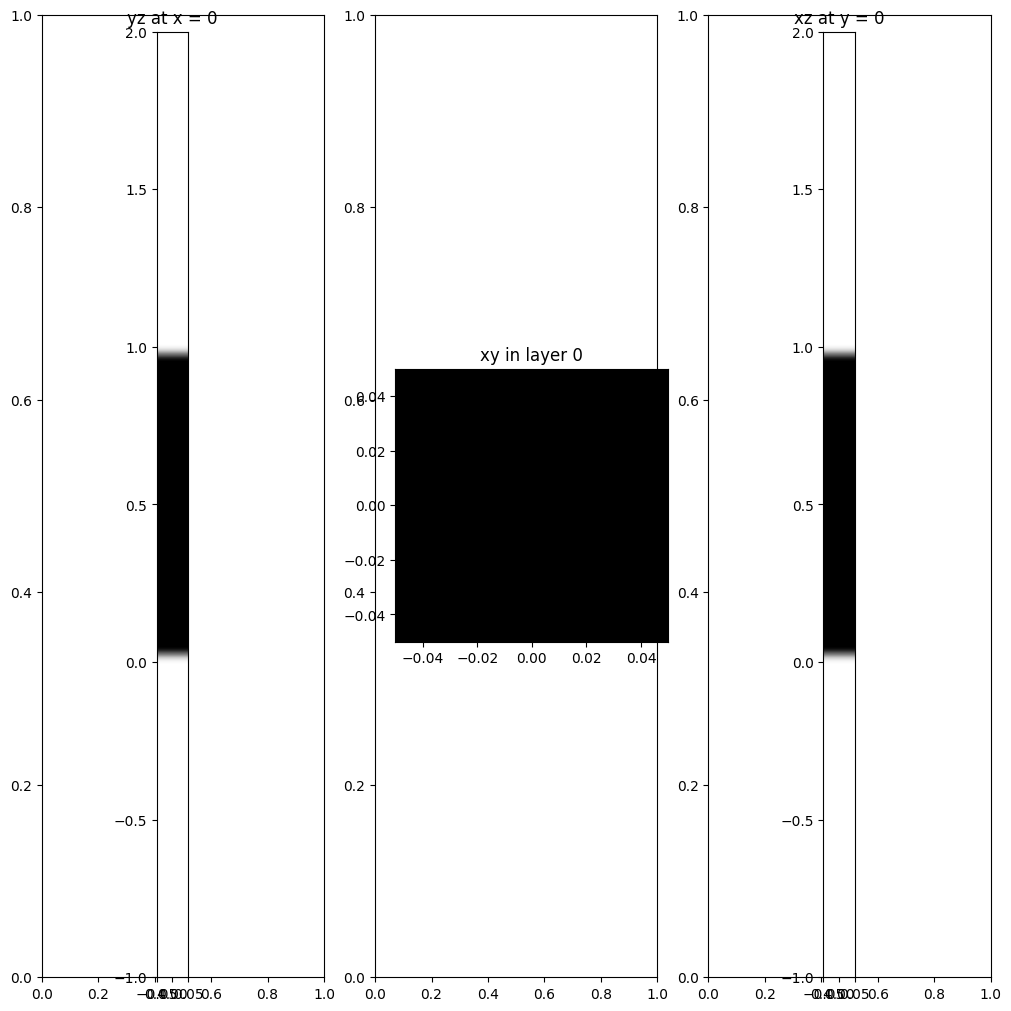

In [158]:
def plot_structure_side_by_side(phc):
    fig = plt.figure(constrained_layout=True, figsize=(10, 10))
    gs = fig.add_gridspec(1, 3)

    # Plot yz view
    ax1 = fig.add_subplot(gs[0])
    legume.viz.structure(phc, yz=True, xy=False, xz=False, fig=fig, gridspec=gs[0],cbar=False)


    # Plot xy view
    ax2 = fig.add_subplot(gs[1])
    legume.viz.structure(phc, yz=False, xy=True, xz=False, fig=fig, gridspec=gs[1],cbar=False)


    # Plot xz view
    ax3 = fig.add_subplot(gs[2])
    legume.viz.structure(phc, yz=False, xy=False, xz=True, fig=fig, gridspec=gs[2],cbar=False)


    plt.show()

# Example usage with your photonic crystal object
plot_structure_side_by_side(phc)

Plotting the bands

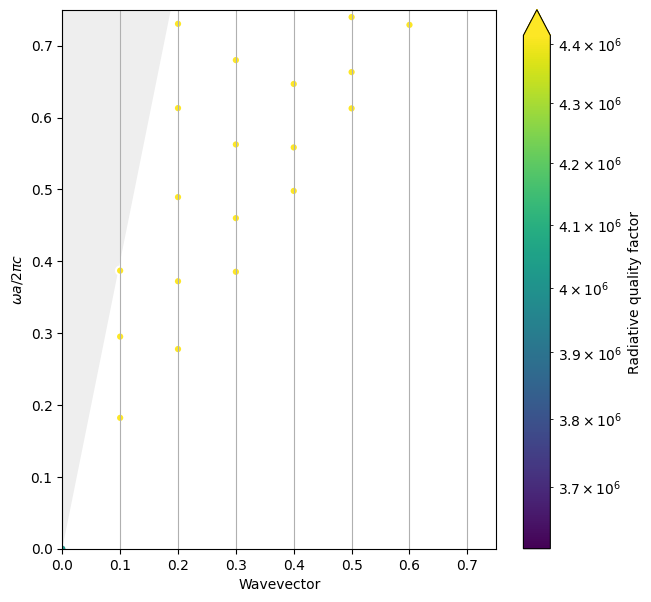

In [160]:
fig, ax = plt.subplots(1, figsize=(7, 7))
legume.viz.bands(gme, figsize=(5, 5), Q=True, ax=ax, k_units=True)
ax.set_ylim([0, 0.75])
ax.set_xlim([0, 0.75])
ax.set_xlabel("Wavevector")
ax.set_ylabel(r"$\omega a/2\pi c$")
ax.xaxis.grid(True)
plt.show()

# Plot fields for different configurations

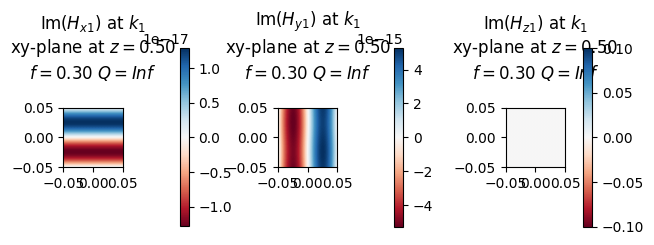

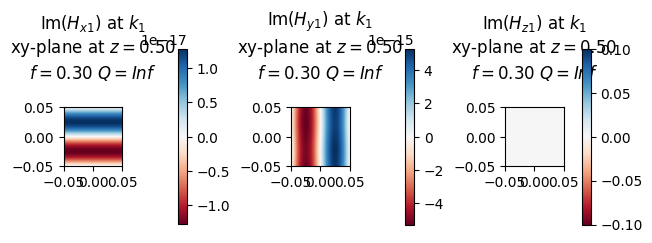

In [161]:

legume.viz.field(gme, 'H', 1, 1, z=D/2, periodic=True, val='im')


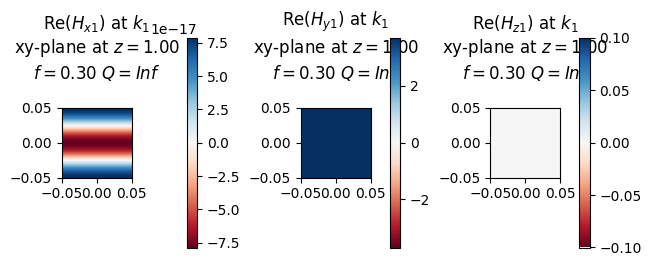

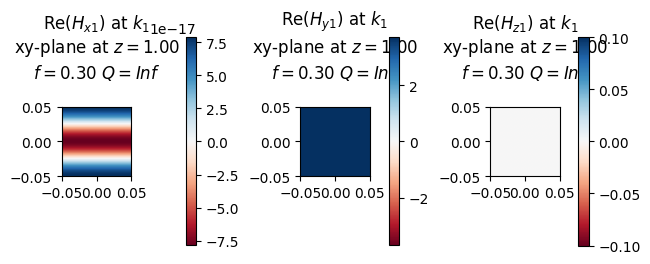

In [162]:
legume.viz.field(gme, 'H', 1, 1, z=D, periodic=True, val='re')


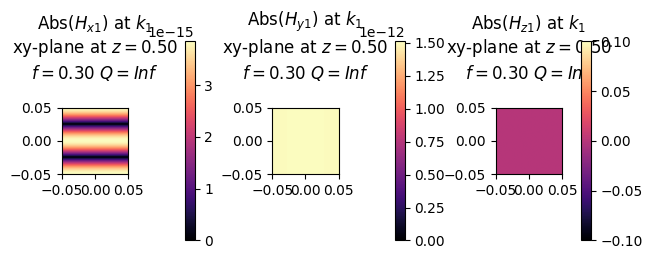

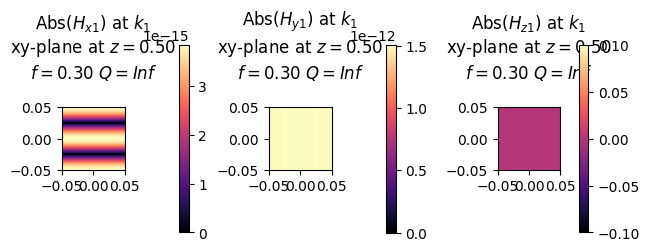

In [163]:
legume.viz.field(gme, 'H', 1, 1, z=D/2, periodic=True, val='abs')


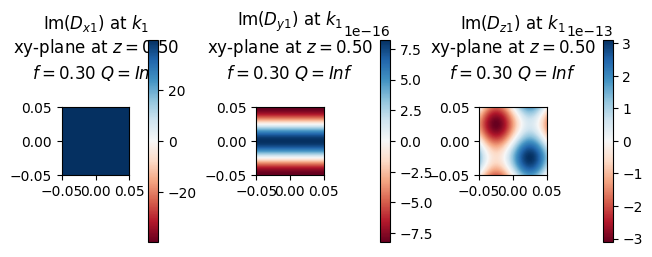

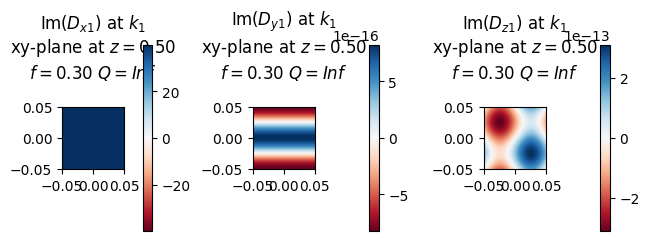

In [164]:
legume.viz.field(gme, 'D', 1, 1, z=D/2, periodic=True, val='im')


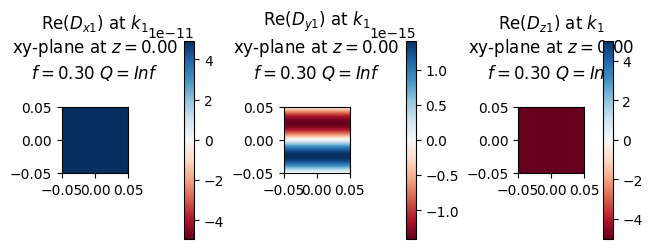

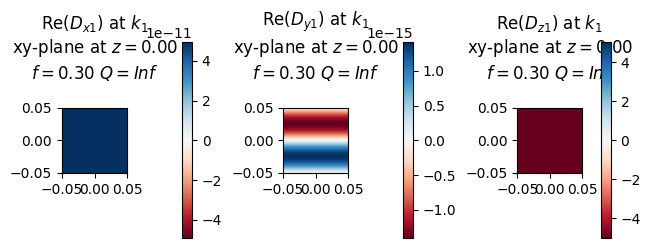

In [165]:
legume.viz.field(gme, 'D', 1, 1, z=0, periodic=True, val='re')


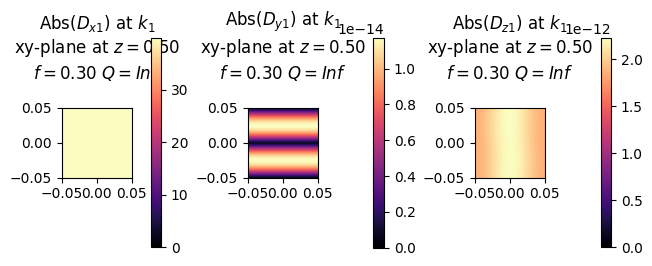

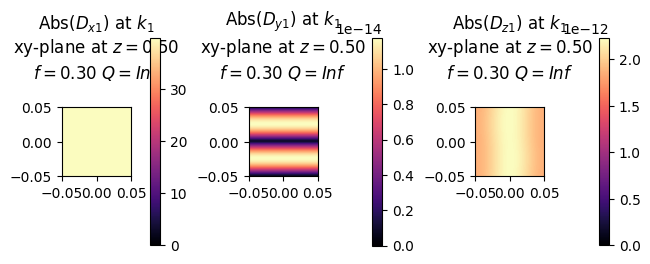

In [166]:
legume.viz.field(gme, 'D', 1, 1, z=D/2, periodic=True, val='abs')

Verification of my data with an actual data set
# Given simulation results for n1, n2, and n3

In [167]:

n1_data = np.array([
    [0.05656324478351993, 0.019112207151664506],
    [0.2263314060641448, 0.08569667077681853],
    [0.7355051783559106, 0.22996300863131935],
    [1.2163929712042465, 0.36683107274969173],
    [1.6171400603306434, 0.48397040690505544],
    [2.2300465187883347, 0.6627620221948212],
    [2.8005123892764257, 0.8255240443896423],
    [3.856600715427886, 1.1350184956843403],
    [3.9933308062433666, 1.1769420468557337]
])

n2_data = np.array([
    [0.20294275269810447, 0.157213316892725],
    [0.6790929780302934, 0.28298397040690504],
    [1.16937166957863, 0.40628853267570864],
    [1.994417164459821, 0.6381011097410603],
    [2.7440246667218577, 0.846485819975339],
    [3.545513035572424, 1.0782983970406907],
    [3.9910389970648, 1.2040690505548703]
])

n3_data = np.array([
    [0.3446573106243802, 0.31504315659679416],
    [0.811306258614255, 0.40752157829839697],
    [1.3392763518115902, 0.530826140567201],
    [1.8955498526590373, 0.6689272503082615],
    [2.480135475259936, 0.8255240443896423],
    [3.479602462605606, 1.099260172626387],
    [3.988767520794031, 1.2398273736128238]
])

MY Plot

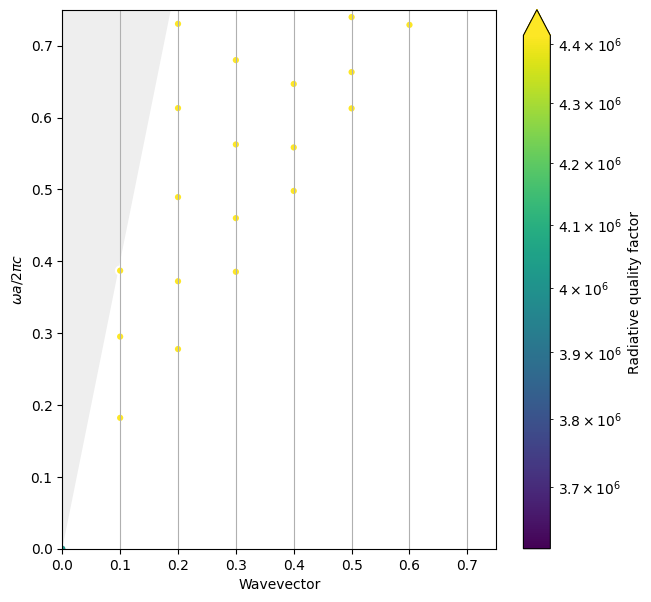

In [168]:
fig, ax = plt.subplots(1, figsize=(7, 7))
legume.viz.bands(gme, figsize=(5, 5), Q=True, ax=ax, k_units=True)
ax.set_ylim([0, 0.75])
ax.set_xlim([0, 0.75])
ax.set_xlabel("Wavevector")
ax.set_ylabel(r"$\omega a/2\pi c$")
ax.xaxis.grid(True)
plt.show()

Super imposed plot

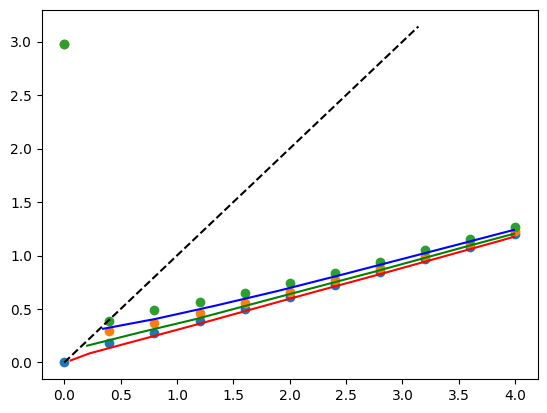

In [169]:
# Plot the simulation results for n1, n2, and n3 over lapping the previous results
ax.set_ylim([0, 1.5])
ax.set_xlim([0, np.pi])
ax.set_xlabel("Wavevector")
ax.set_ylabel(r"$\omega a/2\pi c$")
ax.legend()
ax.xaxis.grid(True)
plt.show()

k_values = path['kpoints'][0]/(2.*np.pi)
plt.plot(k_values, gme.freqs.transpose()[0],'o')
plt.plot(k_values, gme.freqs.transpose()[1],'o')
plt.plot(k_values, gme.freqs.transpose()[2],'o')
# Adding the given data points for n1, n2, and n3 as lines
plt.plot(n1_data[:, 0], n1_data[:, 1], 'r-', label='n1 Data')
plt.plot(n2_data[:, 0], n2_data[:, 1], 'g-', label='n2 Data')
plt.plot(n3_data[:, 0], n3_data[:, 1], 'b-', label='n3 Data')

# Plot the light line
k_values = np.linspace(0, np.pi, 100)
light_line = k_values
plt.plot(k_values, light_line, 'k--', label='Light Line $\omega = ck$')
plt.show()

Introduction of the cavity

Plane waves used in the expansion = 13.
Number of reciprocal lattice vectors in the expansion: npw = 13
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.006    │ │███████-------------│   38% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.003    │ │████----------------│   21% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.015    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Cavity quality factor: 1904666762625148562958809300992.00


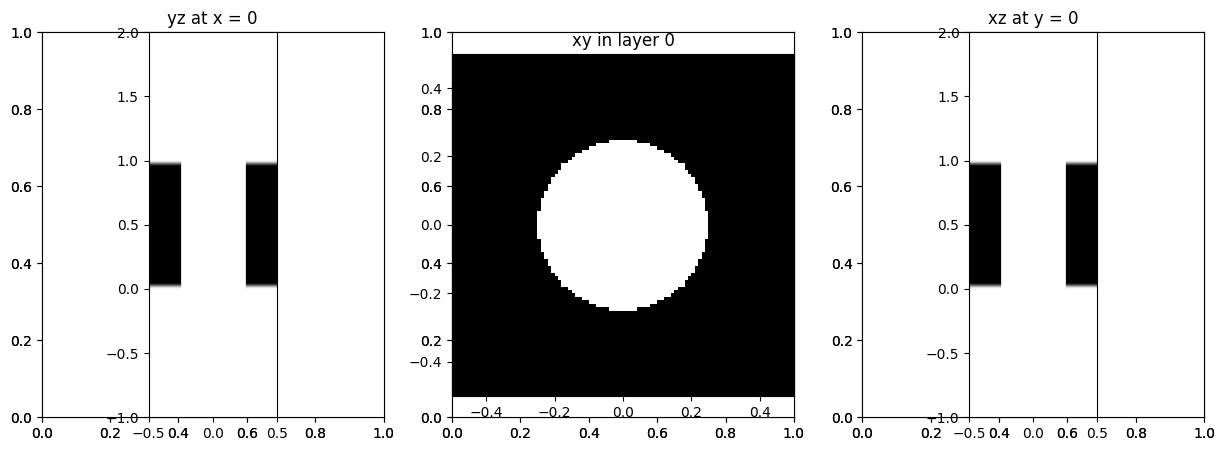

In [171]:
D, r, eps_c, eps_b = 1, 0.25, 1.0, 3
eps_lower, eps_upper, gmax, truncate_g = 1.0, 1.0, 2, 'abs'
Nx, Ny, xc, yc, nc = 1, 1, 0.0, 0.0, 1
dx, dy = np.zeros((nc,)), np.zeros((nc,))

a1, a2 = [Nx, 0], [0, Ny]
lattice = legume.Lattice(a1, a2)
phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
phc.add_layer(d=D, eps_b=eps_b)
phc.layers[-1].add_shape(legume.Circle(eps=eps_c, r=r, x_cent=0., y_cent=0))
gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
options = {'gmode_inds': [1], 'verbose': True, 'numeig': Nx * Ny + 5, 'gradients': 'approx'}
print(f'Number of reciprocal lattice vectors in the expansion: npw = {np.shape(gme.gvec)[1]}')

def cavity(dx, dy):
    phc = legume.PhotCryst(lattice)
    phc.add_layer(d=D, eps_b=eps_b)
    phc.add_shape(legume.Circle(x_cent=xc + dx[0], y_cent=yc + dy[0], r=r))
    return phc

def gme_cavity(dx, dy, gmax, truncate_g, options):
    phc = cavity(dx, dy)
    options['compute_im'] = False
    gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
    gme.run(kpoints=np.array([[0], [0]]), **options)
    (freq_im, _, _) = gme.compute_rad(0, [Nx * Ny])
    Q = gme.freqs[0, Nx * Ny] / 2 / freq_im[0]
    return (gme, Q)

# Run GME simulation and visualize results
(gme, Q) = gme_cavity(dx, dy, gmax, truncate_g, options)
print("Cavity quality factor: %1.2f" % Q)

# Function to plot the structure from different views side by side
def plot_structure_side_by_side(phc):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    gs = fig.add_gridspec(1, 3)

    # Plot yz view
    ax1 = fig.add_subplot(gs[0])
    legume.viz.structure(phc, yz=True, xy=False, xz=False, fig=fig, gridspec=gs[0],cbar=False)


    # Plot xy view
    ax2 = fig.add_subplot(gs[1])
    legume.viz.structure(phc, yz=False, xy=True, xz=False, fig=fig, gridspec=gs[1],cbar=False)


    # Plot xz view
    ax3 = fig.add_subplot(gs[2])
    legume.viz.structure(phc, yz=False, xy=False, xz=True, fig=fig, gridspec=gs[2],cbar=False)

# Example usage with your photonic crystal object
plot_structure_side_by_side(phc)


New lattice for integral

In [189]:
# Define parameters
D, r, eps_c, eps_b = 1, 0.25, 1.0, 3
eps_lower, eps_upper, gmax, truncate_g = 1.0, 1.0, 2, 'abs'
Nx, Ny, xc, yc, nc = 1, 1, 0.0, 0.0, 1
dx, dy = np.zeros((nc,)), np.zeros((nc,))
# Initialize lattice and photonic crystal
a1, a2 = [Nx, 0], [0, Ny]
lattice = legume.Lattice(a1, a2)
options = {'gmode_inds': [1,5, 9, 13, 17], 'verbose': False, 'numeig': Nx * Ny + 5, 'gradients': 'approx'}

Cavity

In [190]:
def cavity(dx, dy, radius):
    """
    Define single-hole PhC cavity. Returns the photonic crystal object.
    Args:
        dx : x offset of the hole center
        dy : y offset of the hole center
        radius: radius of the whole.

    """
    phc = legume.PhotCryst(lattice)
    phc.add_layer(d=D, eps_b=eps_b)
    phc.add_shape(legume.Circle(eps=eps_c,x_cent=xc + dx[0], y_cent=yc + dy[0], r=radius))
    legume.viz.structure(phc, xy=True, figsize=2., cbar=False)
    return phc

def gme_cavity(dx, dy, radius, gmax, truncate_g, options):
    """
    Run the mode calculation and return the resulting GuidedModeExp object
    Args:
        dx : x offset of the hole center
        dy : y offset of the hole center
        radius: radius of the whole.
        gmax : maximum length of the 2D wavevector to include in the calculation
        truncate_g : truncation scheme for the vectors, 'abs' or 'tbt'
        options : options
    """
    phc = cavity(dx, dy, radius)
    options['compute_im'] = False
    gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
    gme.run(kpoints=np.array([[0], [0]]), **options)
    return(gme)

Integral function

In [191]:
def integral_E_j(num_layers, j, A_j, B_j, X_j, omega, eps_j, g, d_j, g_hat):
    """
    Compute the Integral[E(z) z] over one layer using the analytic parametrization given in the supplementary material
    https://pubs-acs-org.ezproxy.library.yorku.ca/doi/suppl/10.1021/acsphotonics.0c00327/suppl_file/ph0c00327_si_001.pdf
    Note that this function is called for several wavenumbers g simultaneously, so that A_j, etc are all vectors [A_j1, Aj2, ...]
    Args:
        num_layers: number of layers in the photonic structure
        j: layer index from 0 to num_layers - 1
        A_j, B_j: expansion coefficients of the guided modes in the homogeneous waveguide
        X_j: quantity related to the frequency, Eq. S10 in the supplementary info
        omega: frequency of the mode
        eps_j: average dielectric constant in the j'th layer
        g: magnitude of the 2D wavevector
        d_j: thickness of the j'th layer
        g_hat: unit wavevector
    """

    N = num_layers - 1
    c = 1
    if j == 0:
        g_hat_coef = -c * 1j / (omega * eps_j * X_j) * ((A_j + B_j) * X_j)
        z_hat_coef = -c * 1j / (omega * eps_j * X_j) * ( (B_j - A_j) * g)
    elif j == N:
        g_hat_coef = c * 1j / (omega * eps_j * X_j) * ((A_j + B_j) * X_j)
        z_hat_coef = c * 1j / (omega * eps_j * X_j) * ((B_j - A_j) * g)
    else:
        g_hat_coef =-2 * c / (omega * eps_j * X_j) * np.sin(X_j * d_j / 2) * ((B_j - A_j) * X_j)
        z_hat_coef =-2 * c / (omega * eps_j * X_j) * np.sin(X_j * d_j / 2) * ((A_j + B_j) * g)
    return(np.array([g_hat_coef*g_hat[0], g_hat_coef*g_hat[1], z_hat_coef]))

# Debugging: Print the guided mode arrays


In [192]:
kpoints = np.array([[0], [0]])
gme.run(kpoints=kpoints, **options)

print(gme.g_array.__sizeof__())
print(gme.omegas_tm.__sizeof__())
print(gme.coeffs_tm.__sizeof__())
print(gme.gvec.__sizeof__())
print(gme.delta_gx.__sizeof__())
print(gme.eigvecs.__sizeof__())

72
72
72
128
24
72


#Compute the overlap factor using the analytic layer integrals
#Args:
##gme : GuidedModeExp object of the structure
##mind : index of the mode for which to compute the integral

In [193]:
def calculate_overlap_factor(gme, mind):

    kind = 0
    k = gme.kpoints[:, kind]
    kx, ky = k[0], k[1]
    gkx = gme.gvec[0, :] + kx + gme.delta_gx
    gky = gme.gvec[1, :] + ky
    gk = np.sqrt(np.square(gkx) + np.square(gky))
    # Unit vectors in the propagation direction; we add a tiny component
    # in the x-direction to avoid problems at gk = 0
    # analogous to ghat in the legume paper
    pkx = gkx / gk
    pky = gky / gk

    # Get the coefficients for the TM mode
    omega = gme.freqs[kind][mind] * 2 * np.pi
    evec = gme.eigvecs[kind][:, mind]
    num_layers = gme.eps_array.size
    total_integral = 0.
    for lind in range(num_layers):
        eps_j = gme.eps_array[lind]

        # Index of the |G|=0 reciprocal lattice vector
        zero_G_index = gk.argmin()

        if lind == 0 or lind == num_layers - 1:
            d_j = np.inf
        else:
            d_j = gme.d_array[lind-1]
        count = 0
        for im1 in range(gme.gmode_include[kind].size):

            mode1 = gme.gmode_include[kind][im1]
            (indmode, oms, As, Bs, chis) = gme._get_guided(gk, kind, mode1)

            if mode1 % 2 == 0:
                print("UH OH TE MODE")

            g_hat = np.array([pkx[indmode],pky[indmode]])
            g_norm = gk[indmode]
            # the quantity below should be equal to the the x-y integral of Exp[i G rho]epsbar(z)/eps(x,y,z)
            inv_eps_ft_at_G = gme.phc.lattice.ec_area*eps_j*gme.eps_inv_mat[lind][indmode,zero_G_index]


            res = integral_E_j(num_layers, lind, As[lind,:], Bs[lind,:], chis[lind,:], omega, eps_j, g_norm, d_j, g_hat)
            vals = evec[count:count+gme.modes_numg[kind][im1]]/np.sqrt(gme.phc.lattice.ec_area)
            total_integral += np.array([np.abs(np.dot(vals,inv_eps_ft_at_G*Ej_integral)) for Ej_integral in res])
            count += gme.modes_numg[kind][im1]

    V_u = D*gme.phc.lattice.ec_area
    eta_u = total_integral/np.sqrt(V_u)
    print("eta_u = ", eta_u)
    return eta_u


In [194]:
def generate_eta_u_vs_radius_graph(radii):
    eta_u_values = []
    for radius in radii:
        gme = gme_cavity(dx, dy, radius, gmax=gmax, truncate_g=truncate_g, options=options)
        eta_u = np.array([np.abs(calculate_overlap_factor(gme,m)[2]) for m in range(5)])
        eta_u_values.append(eta_u)
    return(np.array(eta_u_values))
# Define the range of radii
radii = np.linspace(0.1, 0.4, 10)  # Example: radii from 0.1 to 0.5

# Function to generate eta_u vs. radius graph

Plane waves used in the expansion = 13.
eta_u =  [2.21725699e+02 1.99309701e-23 5.21134243e-09]
eta_u =  [5.44440834e-21 7.32903542e-30 3.32016534e-17]
eta_u =  [2.50673017e-21 2.47427799e-16 5.93411799e-17]
eta_u =  [2.47430284e-16 2.28592340e-30 2.31695063e-16]
eta_u =  [1.84897353e-23 4.74603963e-32 1.91146542e-02]
Plane waves used in the expansion = 13.
eta_u =  [3.07420740e+02 1.38595089e-23 7.19970709e-09]
eta_u =  [2.18526471e-21 3.10953019e-29 1.72445320e-16]
eta_u =  [2.15206492e-16 2.83789916e-30 1.89200902e-16]
eta_u =  [7.87848737e-21 2.15197030e-16 2.85634102e-17]
eta_u =  [8.77290945e-22 2.71232123e-30 3.19545776e-02]
Plane waves used in the expansion = 13.
eta_u =  [3.10497955e+02 7.26890108e-24 7.21341575e-09]
eta_u =  [2.25198945e-21 6.63890357e-30 1.55843474e-16]
eta_u =  [4.09564224e-21 4.53366016e-16 6.57512767e-17]
eta_u =  [4.53379520e-16 3.27738893e-30 9.73291678e-17]
eta_u =  [2.62234698e-21 3.72243349e-30 4.65187473e-02]
Plane waves used in the expansion = 13.


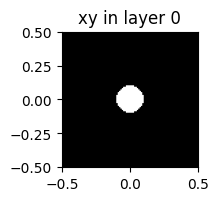

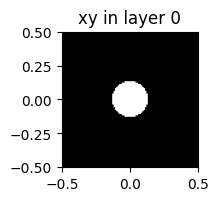

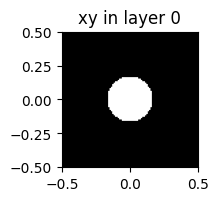

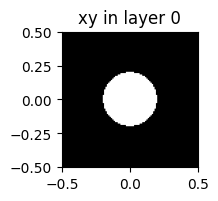

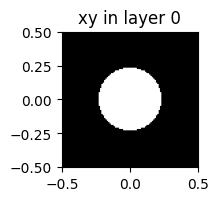

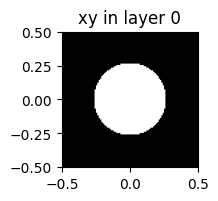

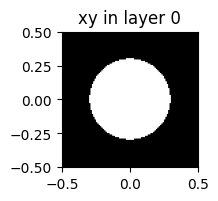

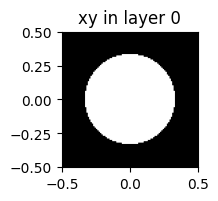

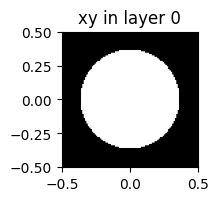

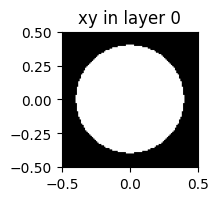

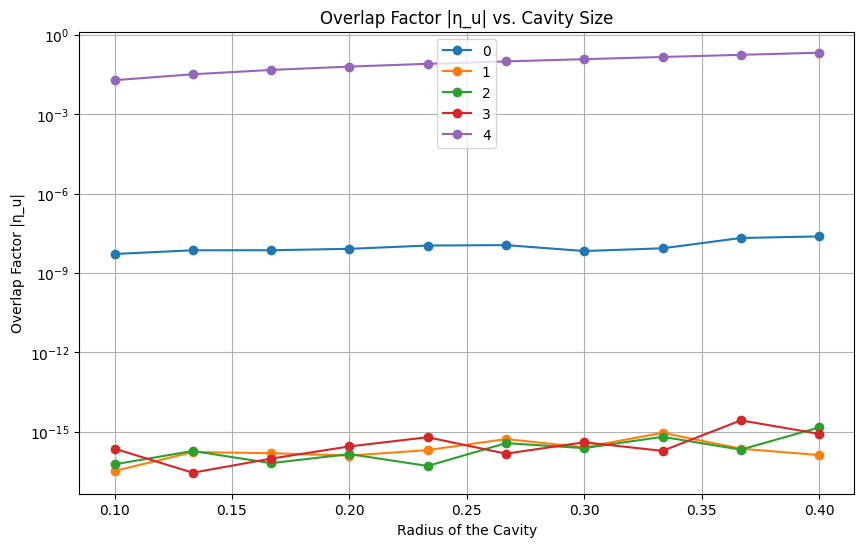

In [197]:
def generate_eta_u_vs_radius_graph(radii):
    eta_u_values = []
    for radius in radii:
        gme = gme_cavity(dx, dy, radius, gmax=gmax, truncate_g=truncate_g, options=options)
        eta_u = np.array([np.abs(calculate_overlap_factor(gme,m)[2]) for m in range(5)])
        eta_u_values.append(eta_u)
    return(np.array(eta_u_values))
# Define the range of radii
radii = np.linspace(0.1, 0.4, 10)  # Example: radii from 0.1 to 0.5
# Generate data for the plot
eta_u_values = generate_eta_u_vs_radius_graph(radii)
# Plotting
plt.figure(figsize=(10, 6))
print(eta_u_values)
for i, eta_us in enumerate(eta_u_values.transpose()):
    plt.plot(radii, eta_us, marker='o', label=str(i))
plt.legend()
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xlabel('Radius of the Cavity')
plt.ylabel('Overlap Factor |η_u|')
#plt.ylabel('Overlap Factor |η_u|^2')
plt.title('Overlap Factor |η_u| vs. Cavity Size')
#plt.title('Overlap Factor |η_u|^2 vs. Cavity Size')
plt.grid(True)
plt.show()

Field camparison with GME field

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import time
import autograd.numpy as npa
from autograd import grad, value_and_grad
import legume
from legume.minimize import Minimize

# Define parameters
D, r, eps_c, eps_b = 1, 0.25, 1.0, 3
eps_lower, eps_upper, gmax, truncate_g = 1.0, 1.0, 2, 'abs'
Nx, Ny, xc, yc, nc = 1, 1, 0.0, 0.0, 1
dx, dy = np.zeros((nc,)), np.zeros((nc,))

# Initialize lattice and photonic crystal
a1, a2 = [Nx, 0], [0, Ny]
lattice = legume.Lattice(a1, a2)
phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
phc.add_layer(d=D, eps_b=eps_b)
phc.layers[-1].add_shape(legume.Circle(eps=eps_c, r=r, x_cent=0., y_cent=0))
# Initialize GME
gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
options = {'gmode_inds': [1], 'verbose': True, 'numeig': Nx * Ny + 5, 'gradients': 'approx'}
print(f'Number of reciprocal lattice vectors in the expansion: npw = {np.shape(gme.gvec)[1]}')


# Define single-hole PhC cavity
def cavity(dx, dy, radius):
    phc = legume.PhotCryst(lattice)
    phc.add_layer(d=D, eps_b=eps_b)
    phc.add_shape(legume.Circle(x_cent=xc + dx[0], y_cent=yc + dy[0], r=radius))
    return phc


# Solve for a cavity defined by shifts dx, dy
def gme_cavity(dx, dy, radius, gmax, truncate_g, options):
    phc = cavity(dx, dy, radius)
    options['compute_im'] = False
    gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
    gme.run(kpoints=np.array([[0], [0]]), **options)
    (freq_im, _, _) = gme.compute_rad(0, [Nx * Ny])
    Q = gme.freqs[0, Nx * Ny] / 2 / freq_im[0]
    return (gme, Q)


# Function to calculate the overlap factor
def calculate_overlap_factor(gme, K, m, Nx_grid=50, Ny_grid=50, Nz_grid=50):
    x_grid = np.linspace(-0.5, 0.5, Nx_grid)
    y_grid = np.linspace(-0.5, 0.5, Ny_grid)
    z_grid = np.linspace(-2 * D, 3 * D, Nz_grid)

    integral_numerator = 0.0
    integral_denominator = 0.0

    for z in z_grid:
        # Check for zero frequency modes and handle them
        if np.isclose(gme.freqs[0, m], 0):
            print(f"Warning: Zero frequency encountered for mode {m}. Skipping...")
            return np.nan  # Or any other appropriate value

        field_data_e = gme.get_field_xy('e', kind=0, mind=m, z=z, xgrid=x_grid, ygrid=y_grid, component='z')[0]
        field_data_d = gme.get_field_xy('d', kind=0, mind=m, z=z, xgrid=x_grid, ygrid=y_grid, component='z')[0]
        Ez = field_data_e['z']
        Dz = field_data_d['z']

        phase_factor = 1/np.exp(-1j * (K[0] * x_grid[:, None] + K[1] * y_grid[None, :]))

        integral_numerator += np.sum(Ez * phase_factor) * (x_grid[1] - x_grid[0]) * (y_grid[1] - y_grid[0])
        integral_denominator += np.sum(Ez * Dz) * (x_grid[1] - x_grid[0]) * (y_grid[1] - y_grid[0])

    integral_numerator *= (z_grid[1] - z_grid[0])
    integral_denominator *= (z_grid[1] - z_grid[0])

    V_u = (x_grid[-1] - x_grid[0]) * (y_grid[-1] - y_grid[0]) * (z_grid[-1] - z_grid[0])

    eta_u = (integral_numerator / V_u)/ np.sqrt(integral_denominator / V_u)
    print(eta_u)

    return eta_u


# Function to generate eta_u vs. radius graph
def generate_eta_u_vs_radius_graph(K, radii):
    eta_u_values = []

    for radius in radii:
        global lattice, phc
        lattice = legume.Lattice(a1, a2)
        phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
        phc.add_layer(d=D, eps_b=eps_b)
        phc.layers[-1].add_shape(legume.Circle(eps=eps_c, r=radius, x_cent=0., y_cent=0))

        gme, _ = gme_cavity(dx, dy, radius, gmax=gmax, truncate_g=truncate_g, options=options)
        # eta_u = calculate_overlap_factor(gme, K,m=0)

        eta_u = np.array([np.abs(calculate_overlap_factor(gme, K,m=m)) for m in range(5)])
        eta_u_values.append(eta_u**2)

    return radii, np.array(eta_u_values)  # Return the radii and eta_u_values


# Define the range of radii
radii = np.linspace(0.1, 0.55, 20)  # Example: radii from 0.1 to 0.5

# Example Bloch wavevector
K = np.array([0, 0])

# Generate data for the plot
radii_values, eta_u_values = generate_eta_u_vs_radius_graph(K, radii)




Plane waves used in the expansion = 13.
Number of reciprocal lattice vectors in the expansion: npw = 13
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.008    │ │██████████----------│   54% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.004    │ │████----------------│   25% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.014    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(3.03754713734554e-09+6.079968596351835e-05j)
(-2.5842571411033275e-18-7.864171556439724e-20j)
(2.9166525843952653e-18-1.4517715633707585e-18j)
(1.1885412272918425e-17+8.892829676512622e-18j)
(-0.003865952000285493-8.380076023202739e-20j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.005    │ │█████████-----------│   50% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.003    │ │█████---------------│   28% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.011    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(3.438754875833088e-09-0.0011948676468815339j)
(-2.0223878813260867e-18-8.53661391403216e-20j)
(-7.7953562295758e-18-6.647648471236503e-18j)
(-9.490117027392271e-18-8.489950380332117e-18j)
(0.00026234985451020467-2.8526160664017233e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.007    │ │███████████---------│   57% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.003    │ │████----------------│   23% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.013    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-1.116846799188089e-17+6.983476992953002e-19j)
(-1.879802090766043e-17+3.9357152279798334e-18j)
(5.478790315626551e-19-4.716829238902346e-18j)
(0.004860561806726599-1.8258649404744492e-20j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.007    │ │███████████---------│   56% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.003    │ │████----------------│   24% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.013    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-1.3366162577233456e-09+0.0013494124159382954j)
(4.730679354227821e-17-6.097441874927459e-19j)
(9.340181706581761e-18-5.624998503942281e-17j)
(-6.056824216941526e-18+8.861855682529856e-18j)
(-0.009821449989174847-9.5185966088244e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.007    │ │███████████---------│   56% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.003    │ │████----------------│   23% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.013    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(1.177798988408152e-09-0.004631744786476815j)
(-1.4681323165784336e-18+2.372517064712934e-19j)
(8.081155663642441e-18-9.88719453358774e-18j)
(-1.5380169428090632e-17+2.6077547400042228e-18j)
(-0.015093584587569325+1.0046512225114235e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.007    │ │████████------------│   43% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.003    │ │████----------------│   20% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.016    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-8.157935345388593e-10-0.0018271088555661102j)
(-4.010157871723195e-17+2.46053741286727e-19j)
(-1.0748593689473576e-17+1.212653577220136e-16j)
(1.0366295031386484e-17+2.0256379523782097e-17j)
(0.020677822789645205-2.1018396307582089e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.005    │ │████████------------│   41% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.003    │ │████----------------│   25% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.013    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-7.400475903738885e-10+0.006374732194938453j)
(-3.415905825955106e-17+5.301658519001136e-19j)
(1.0554971645469728e-17-9.599204574746318e-17j)
(-1.0831583894730443e-17-4.3569336116464856e-17j)
(0.026616534861297367+6.678140739458042e-20j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.006    │ │████████------------│   43% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.003    │ │███-----------------│   20% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.015    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-6.609894476341378e-10+0.0013486441256301907j)
(1.1068851998605495e-16-1.8186913626448893e-19j)
(4.346705220549432e-18+1.9562683662807597e-17j)
(9.809445947895352e-18-1.3646848753882833e-16j)
(0.03298541976705815-4.460344830616862e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.007    │ │█████████-----------│   46% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.003    │ │████----------------│   20% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.015    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(5.893043903845519e-10+0.0025933896748285205j)
(1.807552583100255e-17-7.616019806563041e-19j)
(1.0560987975190176e-17-1.835025384745316e-16j)
(-1.672111574501721e-17+1.4612482153510864e-16j)
(0.03989344371944364+4.900730124056955e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.012    │ │████████------------│   44% │
│ Inverse matrix of Fourier-space permittivity              │ 0.009    │ │██████--------------│   31% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.003    │ │██------------------│   11% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.028    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(6.244264722607279e-10-0.001970549607226545j)
(-1.2899860005484164e-16-5.337194091054098e-19j)
(2.1225010023857478e-17+2.5629438503488593e-17j)
(1.0184778824413462e-17+4.3657609097644645e-18j)
(0.04748907738236767+4.598609478929606e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.005    │ │█████████-----------│   47% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.003    │ │█████---------------│   26% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.011    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(6.47551840370861e-10+0.003614030494216122j)
(6.193924625267648e-17+6.711221137177591e-20j)
(1.0682185814532089e-17-9.182743963877653e-17j)
(9.674723007646075e-18+9.029788867039939e-17j)
(-0.05595781479724596-2.0258445740716357e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.007    │ │█████████-----------│   48% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    2% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.003    │ │████----------------│   20% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.015    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(6.385732206166967e-10-0.0061313668422904016j)
(-4.3660021334473413e-17+1.2016432175427838e-18j)
(-7.574257050366532e-18-2.5120918217121854e-16j)
(1.1524230374428049e-17+4.178914545327186e-18j)
(-0.06547885050908274+1.362618246005688e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.008    │ │███████████---------│   59% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.003    │ │████----------------│   22% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.013    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-6.808528042740872e-10+0.008335270369358874j)
(1.8470328092300438e-16+3.588091039692588e-19j)
(1.1333036411959305e-17-1.180791297040075e-16j)
(1.1504707880627584e-17+8.01194244692518e-16j)
(0.07610056842817511+1.8906155233614154e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.008    │ │███████-------------│   37% │
│ Inverse matrix of Fourier-space permittivity              │ 0.007    │ │██████--------------│   32% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.003    │ │██------------------│   14% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.022    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-7.37698839283701e-10+0.01658649370133382j)
(-1.2804140767782963e-16-7.700698982331216e-20j)
(1.7052785812990563e-17+7.242190930418291e-16j)
(1.1426926292750165e-17+5.5471461142748604e-17j)
(-0.08751779965899797+3.275409982174054e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.008    │ │██████████----------│   52% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.003    │ │███-----------------│   18% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.016    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-7.113774899465814e-10+0.0033115429176525484j)
(1.0659442483149769e-16+3.8889029605948677e-20j)
(1.5961417593609895e-17-1.1091811689314765e-16j)
(-1.0480437305280464e-17-1.7312082370956988e-15j)
(-0.09881449642155353+4.066532525040004e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.006    │ │████████------------│   44% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.003    │ │████----------------│   23% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.014    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-0.10834702529974252-1.6519927137356537e-20j)
(1.3058962129061756e-17+1.5697752976865552e-15j)
(-1.0666600326559233e-17+1.4921541737834414e-15j)
(1.144735214630511e-15+4.0533647714462195e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.007    │ │██████████----------│   55% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.003    │ │████----------------│   24% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.012    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-9.850052774311831e-10+0.003762146318325846j)
(0.11390087863652686-8.612628056640616e-20j)
(4.210938820221553e-18-6.996064119901712e-17j)
(-1.6429524710339328e-17-3.236891129056606e-17j)
(-3.027994448513599e-16+1.488274801265561e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.007    │ │██████████----------│   52% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.004    │ │█████---------------│   28% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.013    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(1.0615525846507012e-09+0.005891521408991696j)
(-0.11284335609096019+4.044733118040798e-20j)
(1.455925759037775e-17+7.402183762760611e-17j)
(1.5106035018688965e-17+2.860877604444426e-16j)
(-1.614054436174612e-18+3.519414569490069e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.005    │ │██████--------------│   31% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.003    │ │████----------------│   21% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.015    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(0.10114314869773594-1.9022242706116092e-19j)
(1.9979078936393432e-17+2.3034641835337924e-18j)
(-2.1837201465460777e-17-2.355938772364122e-16j)
(-4.660148088680119e-17-7.629003542541764e-19j)
(2.976746294411222e-18+1.428852214997739e-16j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.009    │ │██████████----------│   53% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    2% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.003    │ │███-----------------│   18% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.017    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-0.06438167069752086+1.191306882460626e-18j)
(2.430032532675943e-17+5.598321287847934e-17j)
(-3.1792925635843594e-17+1.24191905825621e-16j)
(-9.574777535385429e-18-2.9333603230884433e-20j)
(1.818818595573975e-18+1.7811965232842003e-16j)


(20, 5)


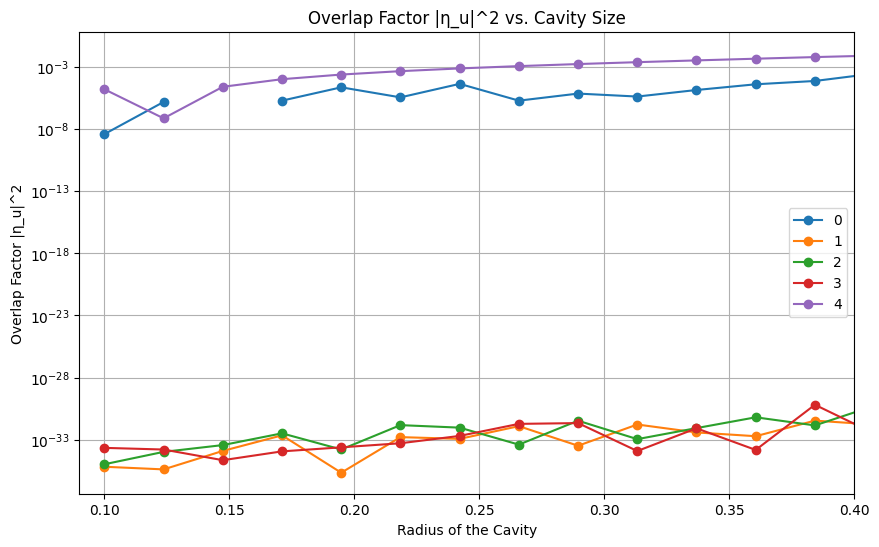

In [199]:
# Plotting
plt.figure(figsize=(10, 6))
print(eta_u_values.shape)
for i, eta_us in enumerate(eta_u_values.transpose()):
    plt.plot(radii_values, eta_us, marker='o', label=str(i))
plt.legend()
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xlabel('Radius of the Cavity')
plt.ylabel('Overlap Factor |η_u|^2')
plt.xlim([0.09, 0.4])
#plt.ylabel('Overlap Factor |η_u|')
plt.title('Overlap Factor |η_u|^2 vs. Cavity Size')
plt.grid(True)
plt.show()

optimizing the cavity based on overlap factor

Plane waves used in the expansion = 13.
Number of reciprocal lattice vectors in the expansion: npw = 13
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.006    │ │██████--------------│   34% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.007    │ │████████------------│   43% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.017    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes     ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 6 eigenmodes │ 0.742    │
└───────────────────────────────────────────────────────────────┴──────────┘

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.049    │ │██████████----------│   52% │
│ Inverse matrix of Fourier-space permittivity              │ 0.019    │ │████----------------│   21% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.013    │ │██------------------│   14% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.094    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [3.70643922e+02 4.14176716e-23 8.37804376e-09]
eta_u_scalar =  Autograd ArrayBox with value 370.64392156818815
eta_u_scalar =  Autograd ArrayBox with value 370.64392156818815
Autograd gradient (eta):  -0.0000, computed in 0.9923s
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.016    │ │███████-------------│   39% │
│ Inverse matrix of Fourier-space permittivity              │ 0.006    │ │███-----------------│   16% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.014    │ │██████--------------│   33% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.041    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.014    │ │██████--------------│   30% │
│ Inverse matrix of Fourier-space permittivity              │ 0.010    │ │████----------------│   21% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.017    │ │███████-------------│   35% │
│ Creating GME matrix                                       │ 0.003    │ │█-------------------│    7% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.047    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  [3.50808810e+02 7.39807509e-23 9.60049036e-09]
eta_u_scalar =  350.8088099206252
eta_u_scalar =  350.8088099206252
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.009    │ │█████---------------│   28% │
│ Inverse matrix of Fourier-space permittivity              │ 0.012    │ │███████-------------│   37% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.008    │ │████----------------│   24% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.032    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.014    │ │██████--------------│   32% │
│ Inverse matrix of Fourier-space permittivity              │ 0.007    │ │███-----------------│   15% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.016    │ │███████-------------│   38% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.043    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  [3.70643922e+02 4.14176716e-23 8.37804376e-09]
eta_u_scalar =  370.64392156818815
eta_u_scalar =  370.64392156818815
Numerical gradient (eta): 1983511.1648, computed in 0.3889s
Relative difference (eta): 1.00e+00
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.016    │ │████████████--------│   65% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.004    │ │██------------------│   14% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.025    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.009    │ │█████████-----------│   47% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.005    │ │████----------------│   24% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.020    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [3.70643922e+02 4.14176716e-23 8.37804376e-09]
eta_u_scalar =  Autograd ArrayBox with value 370.64392156818815
eta_u_scalar =  Autograd ArrayBox with value 370.64392156818815
Epoch:    1/  10 | Duration:   0.14 secs | Objective: -3.706439e+02
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.014    │ │██████████----------│   51% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    2% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.011    │ │███████-------------│   37% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.028    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.014    │ │████████------------│   43% │
│ Inverse matrix of Fourier-space permittivity              │ 0.006    │ │███-----------------│   20% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.010    │ │██████--------------│   31% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.033    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [3.70643922e+02 4.14176716e-23 8.37804376e-09]
eta_u_scalar =  Autograd ArrayBox with value 370.64392156818815
eta_u_scalar =  Autograd ArrayBox with value 370.64392156818815
Epoch:    2/  10 | Duration:   0.19 secs | Objective: -3.706439e+02
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.008    │ │███████-------------│   38% │
│ Inverse matrix of Fourier-space permittivity              │ 0.003    │ │███-----------------│   16% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.008    │ │███████-------------│   37% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.022    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.010    │ │███████-------------│   37% │
│ Inverse matrix of Fourier-space permittivity              │ 0.003    │ │██------------------│   12% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.010    │ │███████-------------│   36% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.028    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [3.70643922e+02 4.14176716e-23 8.37804376e-09]
eta_u_scalar =  Autograd ArrayBox with value 370.64392156818815
eta_u_scalar =  Autograd ArrayBox with value 370.64392156818815
Epoch:    3/  10 | Duration:   0.17 secs | Objective: -3.706439e+02
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.018    │ │████████------------│   41% │
│ Inverse matrix of Fourier-space permittivity              │ 0.008    │ │███-----------------│   19% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.009    │ │████----------------│   22% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.043    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.022    │ │████████------------│   44% │
│ Inverse matrix of Fourier-space permittivity              │ 0.006    │ │██------------------│   13% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.005    │ │█-------------------│   10% │
│ Creating GME matrix                                       │ 0.011    │ │████----------------│   23% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.049    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [3.44872530e+02 8.66554184e-23 8.61538415e-09]
eta_u_scalar =  Autograd ArrayBox with value 344.8725301027046
eta_u_scalar =  Autograd ArrayBox with value 344.8725301027046
Epoch:    4/  10 | Duration:   0.24 secs | Objective: -3.448725e+02
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.022    │ │████████------------│   44% │
│ Inverse matrix of Fourier-space permittivity              │ 0.008    │ │███-----------------│   16% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.003    │ │█-------------------│    6% │
│ Creating GME matrix                                       │ 0.008    │ │███-----------------│   17% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.049    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.014    │ │█████████-----------│   48% │
│ Inverse matrix of Fourier-space permittivity              │ 0.003    │ │█-------------------│    9% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.002    │ │█-------------------│    6% │
│ Creating GME matrix                                       │ 0.007    │ │████----------------│   25% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.029    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [2.86434194e+02 1.15542828e-23 7.34117258e-09]
eta_u_scalar =  Autograd ArrayBox with value 286.43419385901717
eta_u_scalar =  Autograd ArrayBox with value 286.43419385901717
Epoch:    5/  10 | Duration:   0.20 secs | Objective: -2.864342e+02
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.013    │ │███████-------------│   38% │
│ Inverse matrix of Fourier-space permittivity              │ 0.007    │ │███-----------------│   19% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.011    │ │██████--------------│   32% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.035    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.010    │ │███████-------------│   37% │
│ Inverse matrix of Fourier-space permittivity              │ 0.005    │ │███-----------------│   17% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.007    │ │█████---------------│   28% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.027    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [5.26213215e+02 8.26503852e-23 1.20458394e-08]
eta_u_scalar =  Autograd ArrayBox with value 526.2132148785829
eta_u_scalar =  Autograd ArrayBox with value 526.2132148785829
Epoch:    6/  10 | Duration:   0.17 secs | Objective: -5.262132e+02
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.012    │ │██████--------------│   31% │
│ Inverse matrix of Fourier-space permittivity              │ 0.013    │ │██████--------------│   35% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.010    │ │█████---------------│   26% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.038    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.015    │ │████████------------│   41% │
│ Inverse matrix of Fourier-space permittivity              │ 0.012    │ │██████--------------│   32% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.006    │ │███-----------------│   16% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.036    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [4.20970572e+03 4.16430625e-21 9.78508353e-08]
eta_u_scalar =  Autograd ArrayBox with value 4209.705719030146
eta_u_scalar =  Autograd ArrayBox with value 4209.705719030146
Epoch:    7/  10 | Duration:   0.24 secs | Objective: -4.209706e+03
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.022    │ │███████-------------│   39% │
│ Inverse matrix of Fourier-space permittivity              │ 0.013    │ │████----------------│   23% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.017    │ │█████---------------│   29% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.057    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.023    │ │█████████-----------│   49% │
│ Inverse matrix of Fourier-space permittivity              │ 0.004    │ │█-------------------│    8% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.011    │ │████----------------│   23% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.047    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [3.20987052e+02 1.57681907e-23 7.99318764e-09]
eta_u_scalar =  Autograd ArrayBox with value 320.9870518370754
eta_u_scalar =  Autograd ArrayBox with value 320.9870518370754
Epoch:    8/  10 | Duration:   0.25 secs | Objective: -3.209871e+02
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.054    │ │████████████--------│   63% │
│ Inverse matrix of Fourier-space permittivity              │ 0.011    │ │██------------------│   13% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.012    │ │██------------------│   14% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.087    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.015    │ │█████████-----------│   48% │
│ Inverse matrix of Fourier-space permittivity              │ 0.008    │ │█████---------------│   26% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.004    │ │██------------------│   12% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.032    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [5.26213215e+02 2.23769230e-23 1.15888649e-08]
eta_u_scalar =  Autograd ArrayBox with value 526.213214878126
eta_u_scalar =  Autograd ArrayBox with value 526.213214878126
Epoch:    9/  10 | Duration:   0.26 secs | Objective: -5.262132e+02
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.007    │ │███-----------------│   16% │
│ Inverse matrix of Fourier-space permittivity              │ 0.011    │ │█████---------------│   28% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.003    │ │█-------------------│    6% │
│ Creating GME matrix                                       │ 0.018    │ │████████------------│   45% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.040    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.023    │ │████████------------│   43% │
│ Inverse matrix of Fourier-space permittivity              │ 0.018    │ │██████--------------│   33% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.009    │ │███-----------------│   16% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.053    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [3.50808810e+02 2.88110090e-22 8.97800911e-09]
eta_u_scalar =  Autograd ArrayBox with value 350.8088099200027
eta_u_scalar =  Autograd ArrayBox with value 350.8088099200027
Epoch:   10/  10 | Duration:   0.27 secs | Objective: -3.508088e+02
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.024    │ │████████------------│   44% │
│ Inverse matrix of Fourier-space permittivity              │ 0.017    │ │██████--------------│   31% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.010    │ │███-----------------│   19% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.056    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.022    │ │████████------------│   42% │
│ Inverse matrix of Fourier-space permittivity              │ 0.010    │ │████----------------│   20% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.016    │ │██████--------------│   31% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.051    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  [3.50808810e+02 2.88110090e-22 8.97800911e-09]
eta_u_scalar =  350.8088099200027
Optimized eta_u:  350.8088099200027
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.017    │ │███████-------------│   37% │
│ Inverse matrix of Fourier-space permittivity              │ 0.011    │ │████----------------│   24% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.012    │ │█████---------------│   27% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.045    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.022    │ │██████████----------│   52% │
│ Inverse matrix of Fourier-space permittivity              │ 0.014    │ │██████--------------│   33% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.003    │ │█-------------------│    8% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.042    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Cavity quality factor: 1904666762625148562958809300992.00


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 2 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 1.739    │ │███████████████-----│   76% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.072    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.359    │ │███-----------------│   16% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 21 k-points   │ 2.273    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes


 Number of wavevectors = 21, number of frequencies = 4



┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 2 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.715    │ │██████████████------│   73% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.012    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.160    │ │███-----------------│   16% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 21 k-points   │ 0.984    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

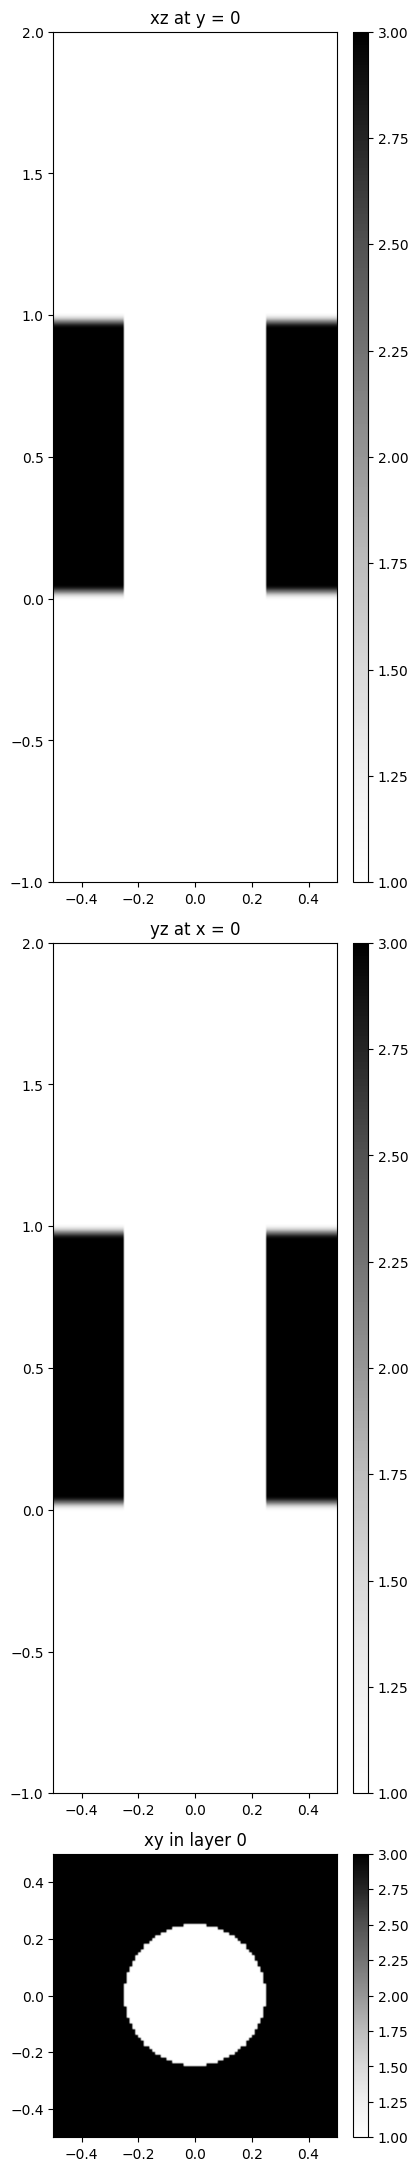

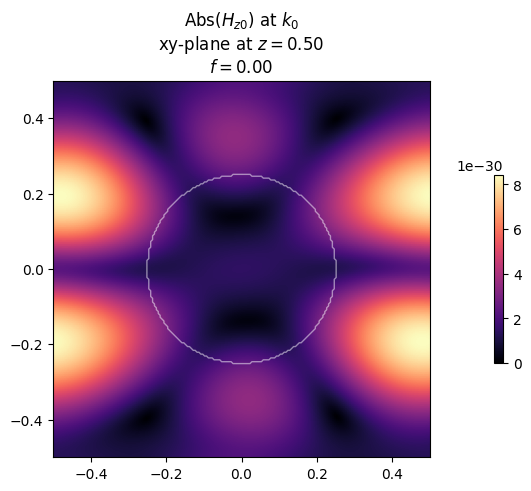

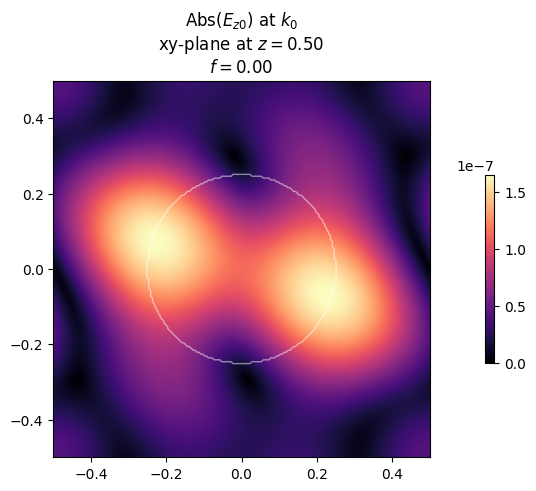

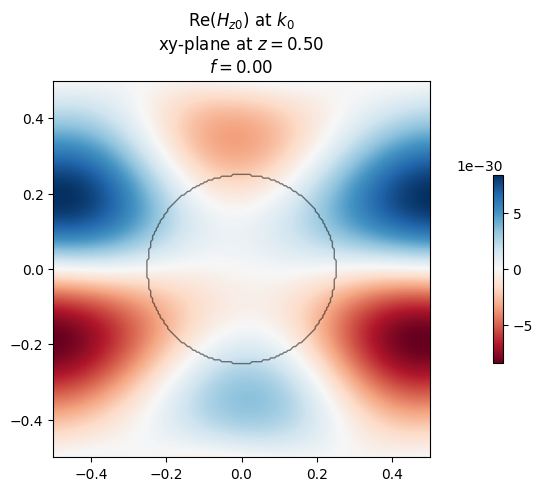

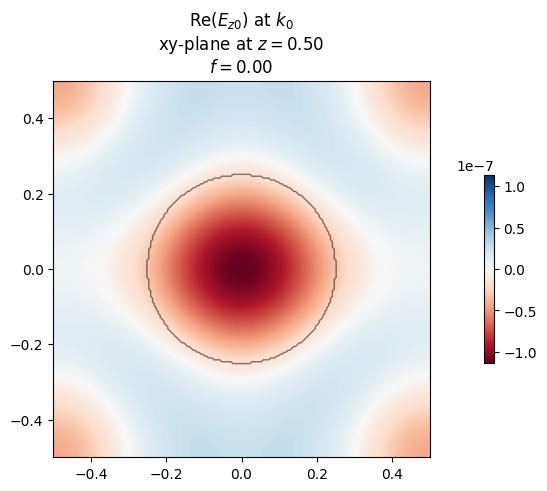

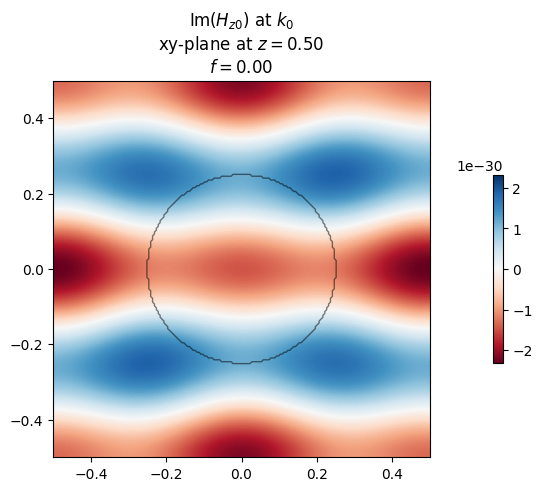

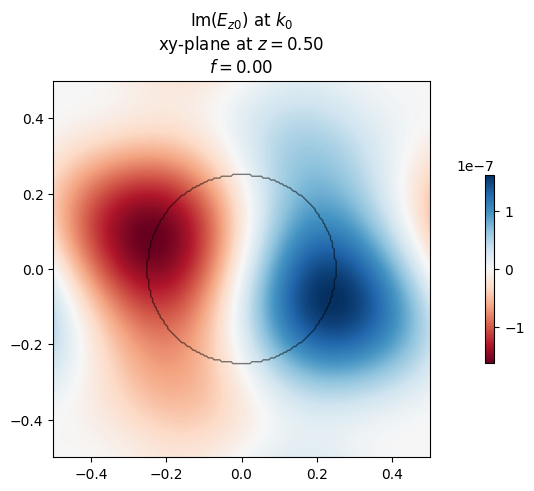

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.014    │ │███████████---------│   59% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │█-------------------│    6% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.005    │ │███-----------------│   20% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.024    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.007    │ │█████████-----------│   46% │
│ Inverse matrix of Fourier-space permittivity              │ 0.002    │ │██------------------│   15% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.003    │ │████----------------│   22% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.015    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  [3.70643922e+02 4.14176716e-23 8.37804376e-09]
eta_u_scalar =  370.64392156818815
R_ij: [0 0], term: (1-0j)
Single unit cell overlap factor eta_u: 370.64392156818815
Time-averaged overlap factor eta: 370.64392156818815


In [200]:

import matplotlib.pyplot as plt
import time
import autograd.numpy as np
from autograd import grad, value_and_grad
import legume
from legume.minimize import Minimize

# Define parameters
D, r, eps_c, eps_b = 1.0, 0.25, 1.0, 3
eps_lower, eps_upper, gmax, truncate_g = 1.0, 1.0, 2, 'abs'
Nx, Ny, xc, yc, nc = 1, 1, 0.0, 0.0, 1
dx, dy = np.zeros((nc,)), np.zeros((nc,))

a1, a2 = [Nx, 0], [0, Ny]
lattice = legume.Lattice(a1, a2)
phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
phc.add_layer(d=D, eps_b=eps_b)
phc.layers[-1].add_shape(legume.Circle(eps=eps_c, r=r, x_cent=0., y_cent=0))
gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
options = {'gmode_inds': [1], 'verbose': True, 'numeig': Nx * Ny + 5, 'gradients': 'approx'}
print(f'Number of reciprocal lattice vectors in the expansion: npw = {np.shape(gme.gvec)[1]}')

def integral_E_j(num_layers, j, A_j, B_j, X_j, omega, eps_j, g, d_j, g_hat):

    N = num_layers - 1
    c = 1
    if j == 0:
        g_hat_coef = -c * 1j / (omega * eps_j * X_j) * ((A_j + B_j) * X_j)
        z_hat_coef = -c * 1j / (omega * eps_j * X_j) * ((B_j - A_j) * g)
    elif j == N:
        g_hat_coef = c * 1j / (omega * eps_j * X_j) * ((A_j + B_j) * X_j)
        z_hat_coef = c * 1j / (omega * eps_j * X_j) * ((B_j - A_j) * g)
    else:
        g_hat_coef = -2 * c / (omega * eps_j * X_j) * np.sin(X_j * d_j / 2) * ((B_j - A_j) * X_j)
        z_hat_coef = -2 * c / (omega * eps_j * X_j) * np.sin(X_j * d_j / 2) * ((A_j + B_j) * g)
    return (np.array([g_hat_coef * g_hat[0], g_hat_coef * g_hat[1], z_hat_coef]))

def cavity(dx, dy, radius):
    phc = legume.PhotCryst(lattice)
    phc.add_layer(d=D, eps_b=eps_b)
    phc.add_shape(legume.Circle(eps=eps_c, x_cent=xc + dx[0], y_cent=yc + dy[0], r=radius))
    # legume.viz.structure(phc, xy=True, figsize=2., cbar=True)

    # Run the GME simulation for visualization
    gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
    gme.run(kpoints=np.array([[0], [0]]), **options)

    # Visualize the fields

    # legume.viz.field(gme, 'H', 0, 0, z=D / 2, periodic=True, val='abs')
    # legume.viz.field(gme, 'E', 0, 0, z=D / 2, periodic=True, val='abs')
    # legume.viz.field(gme, 'M', 0, 0, z=D / 2, periodic=True, val='re')
    # legume.viz.field(gme, 'D', 0, 0, z=D / 2, periodic=True, val='abs')
    plt.show()

    return phc

def gme_cavity(dx, dy, radius, gmax, truncate_g, options):
    phc = cavity(dx, dy, radius)
    options['compute_im'] = False
    gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
    gme.run(kpoints=np.array([[0], [0]]), **options)
    return (gme)

def of_Q(params):
    dx = params[:nc]
    dy = params[nc:]
    gme = gme_cavity(dx, dy, radius=0.25, gmax=gmax, truncate_g=truncate_g, options=options)
    try:
        freq_im, _, _ = gme.compute_rad(0, [Nx * Ny])
        Q = gme.freqs[0, Nx * Ny] / 2 / freq_im[0]
    except ValueError:
        Q = 0
    return -Q

def calculate_overlap_factor(gme, mind):
    kind = 0
    k = gme.kpoints[:, kind]
    kx, ky = k[0], k[1]
    gkx = gme.gvec[0, :] + kx + gme.delta_gx
    gky = gme.gvec[1, :] + ky
    gk = np.sqrt(np.square(gkx) + np.square(gky))
    # Unit vectors in the propagation direction; we add a tiny component
    # in the x-direction to avoid problems at gk = 0
    # analogous to ghat in the legume paper
    pkx = gkx / gk
    pky = gky / gk

    # Get the coefficients for the TM mode
    omega = gme.freqs[kind][mind] * 2 * np.pi
    evec = gme.eigvecs[kind][:, mind]
    num_layers = gme.eps_array.size
    total_integral = 0.
    for lind in range(num_layers):
        eps_j = gme.eps_array[lind]

        # Index of the |G|=0 reciprocal lattice vector
        zero_G_index = gk.argmin()

        if lind == 0 or lind == num_layers - 1:
            d_j = np.inf
        else:
            d_j = gme.d_array[lind - 1]
        count = 0
        for im1 in range(gme.gmode_include[kind].size):

            mode1 = gme.gmode_include[kind][im1]
            (indmode, oms, As, Bs, chis) = gme._get_guided(gk, kind, mode1)

            if mode1 % 2 == 0:
                print("UH OH TE MODE")

            g_hat = np.array([pkx[indmode], pky[indmode]])
            g_norm = gk[indmode]
            # the quantity below should be equal to the the x-y integral of Exp[i G rho]epsbar(z)/eps(x,y,z)
            inv_eps_ft_at_G = gme.phc.lattice.ec_area * eps_j * gme.eps_inv_mat[lind][indmode, zero_G_index]

            res = integral_E_j(num_layers, lind, As[lind, :], Bs[lind, :], chis[lind, :], omega, eps_j, g_norm, d_j,
                               g_hat)
            vals = evec[count:count + gme.modes_numg[kind][im1]] / np.sqrt(gme.phc.lattice.ec_area)
            total_integral += np.array([np.abs(np.dot(vals, inv_eps_ft_at_G * Ej_integral)) for Ej_integral in res])
            count += gme.modes_numg[kind][im1]

    V_u = D * gme.phc.lattice.ec_area
    eta_u = total_integral / np.sqrt(V_u)
    print("eta_u = ", eta_u)
    eta_u_scalar = np.sum(eta_u)  # Ensure eta_u is a scalar
    print("eta_u_scalar = ", eta_u_scalar)
    return eta_u_scalar

def generate_eta_u_vs_radius_graph(radii):
    eta_u_values = []
    for radius in radii:
        gme = gme_cavity(dx, dy, radius, gmax=gmax, truncate_g=truncate_g, options=options)
        eta_u = np.array([np.abs(calculate_overlap_factor(gme, m)[2]) for m in range(5)])
        eta_u_values.append(eta_u)
    return np.array(eta_u_values)

def of_eta(params):
    dx = params[:nc]
    dy = params[nc:]
    gme = gme_cavity(dx, dy, radius=0.25, gmax=gmax, truncate_g=truncate_g, options=options)
    eta_u_scalar = calculate_overlap_factor(gme, 0)  # Assuming we optimize for the first mode
    print("eta_u_scalar = ", eta_u_scalar)
    return -np.abs((eta_u_scalar))  # Optimize eta_u_scalar

# Initialize starting parameters
pstart = np.zeros((2 * nc,))

# Compute gradients using autograd for eta
legume.set_backend('autograd')
obj_grad = value_and_grad(of_eta)
ind0 = 0
t = time.time()
grad_a_eta = obj_grad(pstart)[1]
print("Autograd gradient (eta):  %1.4f, computed in %1.4fs" % (grad_a_eta[ind0], time.time() - t))

t = time.time()
p_test = np.copy(pstart)
p_test[ind0] += 1e-5
grad_n_eta = (of_eta(p_test) - of_eta(pstart)) / 1e-5
print("Numerical gradient (eta): %1.4f, computed in %1.4fs" % (grad_n_eta, time.time() - t))
print("Relative difference (eta): %1.2e" % np.abs((grad_a_eta[ind0] - grad_n_eta) / grad_n_eta))

# Optimize eta using Adam
opt_eta = Minimize(of_eta)
(p_opt_eta, ofs_eta) = opt_eta.adam(pstart, step_size=0.005, Nepochs=10, bounds=[-0.25, 0.25])
dx_eta, dy_eta = p_opt_eta[:nc], p_opt_eta[nc:]

# Run the final simulation for the optimized parameters for eta
gme_opt_eta = gme_cavity(dx_eta, dy_eta, radius=0.25, gmax=gmax, truncate_g=truncate_g, options=options)
eta_u_opt = calculate_overlap_factor(gme_opt_eta, 0)
print("Optimized eta_u: ", eta_u_opt)

# Initialize GME and run the simulation
path = lattice.bz_path([[0, 0], [np.pi, np.pi]], [20])
gme = gme_cavity(dx, dy, radius=0.25, gmax=gmax, truncate_g=truncate_g, options=options)
freq_im, _, _ = gme.compute_rad(0, [Nx * Ny])
Q = gme.freqs[0, Nx * Ny] / 2 / freq_im[0]
print("Cavity quality factor: %1.2f" % Q)

gme.run(kpoints=path['kpoints'], gmode_inds=[0, 3], numeig=4, verbose=True, compute_im=False)
freqs_xyeven = gme.freqs
print(f'\n Number of wavevectors = {freqs_xyeven.shape[0]}, number of frequencies = {freqs_xyeven.shape[1]}\n')

gme.run(kpoints=path['kpoints'], gmode_inds=[1, 2], numeig=4, verbose=True, compute_im=False)
freqs_xyodd = gme.freqs
X0, X = legume.viz.calculate_x(path["kpoints"], 4, k_units=True)

legume.viz.structure(phc, xz=True, xy=True, yz=True, figsize=4)
plt.show()

# Visualize the fields
ax = legume.viz.field(gme, 'h', 0, 0, z=D / 2, component='z', val='abs', N1=200, N2=200)
ax = legume.viz.field(gme, 'e', 0, 0, z=D / 2, component='z', val='abs', N1=200, N2=200)
ax = legume.viz.field(gme, 'h', 0, 0, z=D / 2, component='z', val='re', N1=200, N2=200)
ax = legume.viz.field(gme, 'e', 0, 0, z=D / 2, component='z', val='re', N1=200, N2=200)
ax = legume.viz.field(gme, 'h', 0, 0, z=D / 2, component='z', val='im', N1=200, N2=200)
ax = legume.viz.field(gme, 'e', 0, 0, z=D / 2, component='z', val='im', N1=200, N2=200)
plt.show()

def time_average_overlap_factor(eta_u, K, Nx, Ny):
    N_u = Nx * Ny
    sum_ij = 0.0
    for i in range(Nx):
        for j in range(Ny):
            for k in range(Nx):
                for l in range(Ny):
                    R_ij = np.array([i - k, j - l])
                    term = np.exp(-1j * np.dot(K, R_ij))
                    sum_ij += term
                    print(f"R_ij: {R_ij}, term: {term}")
    eta = np.abs(eta_u)**2 * (1 / N_u**2) * np.real(sum_ij)
    return np.sqrt(np.real(eta))

K = np.array([0, 0])
gme = gme_cavity(dx, dy, radius=0.25, gmax=gmax, truncate_g=truncate_g, options=options)
eta_u = calculate_overlap_factor(gme, 0)
eta = time_average_overlap_factor(eta_u, K, Nx, Ny)
print("Single unit cell overlap factor eta_u:", eta_u)
print("Time-averaged overlap factor eta:", eta)
